## Non-Negative Matrix Factorization (NMF)

Vamos a implementar un algoritmo de detección de tópicos denominado **Non-Negative matrix factorization**, basado en la descomposición de la matriz de *documentos x términos* como la multiplicación de dos matrices con elementos no negativos, que nos darán información sobre los tópicos presentes en cada documento y los términos que definen cada tópico respectivamente. Utilizaremos principalmente la implementación en la librería [**Scikit-learn**](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html).

Comenzamos cargando el diccionario y el corpus previamente construidos:

In [1]:
# -*- coding: utf8 -*-
from gensim.corpora import Dictionary
import cPickle as pk

# Cargado del diccionario construido
dictionary = Dictionary.load('tutorial.dict')

# Cargado del corpus como bag or words
corpus = pk.load(file('Tutorial_corpus.pk','r'))

Para utilizar la implementación en Scikit-learn necesitamos transformar el corpus en una matriz sparse que Scikit-learn entiende. Gensim nos permite hacer esto fácilmente:

In [2]:
from gensim.matutils import corpus2csc

# Corpus para sklearn
corpus2sklearn = corpus2csc(corpus).T

La transposición (*.T*) nos permite que la matriz quede armada de forma tal que cada documento sea un vector fila en el espacio de términos. Esto se ve inspeccionando las dimensiones de la matriz:

In [3]:
print('Dimensiones: {}'.format(corpus2sklearn.shape))

Dimensiones: (400, 18646)


Vemos que la matriz tiene 400 filas que es el número de documentos cargados y 18646 términos que los describen.

### NMF

[**Non Negative Matrix Factorization**](https://es.wikipedia.org/wiki/Factorizaci%C3%B3n_no_negativa_de_matrices) es un tipo de descomposición matricial que en la mayoría de los casos no puede hacerse de forma exacta. La idea es descomponer una matriz con elementos no negativos como un producto de otras dos matrices compuestas también por elementos no negativos: 

$$ A^{(m \times n)} = H^{(m \times k)} \cdot W^{(k \times n)} $$

donde $H$ y $W$ tienen todos sus elementos no negativos y $k$ es un parámetro que indica una dimensión latente y que debe ser elegido antes de realizar la descomposición.
**NMF** es particularmente útil para la descomposición de un corpus de texto en un cierto número de tópicos, especificados por el parámetro $k$. La no negatividad de todas las matrices involucradas en el cálculo permite que la interpretación sea directa: si $A$ es una matriz de documentos por términos, $H$ contiene a los documentos descritos en la base de tópicos y $W$ a los tópicos descritos en el espacio de términos.
Por otro lado las componentes indican pesos: el peso de un tópico en un documento dado o bien el peso de un término en un determinado tópico.

Vamos a utilizar **Scikit-learn** para la aplicación de este modelo. 
El esquema de trabajo en **Scikit-learn** es generalmente el siguiente:
- Importar la clase del modelo que queremos utilizar.
- Creamos un objeto a partir de la clase con los parámetros que querramos.
- Llamamos al método *fit_transform* del objeto creado pasandole como argumentos los datos, en nuestro caso la matriz asociada al corpus.

Por lo tanto comenzamos importando la clase de NMF:

In [4]:
from sklearn.decomposition import NMF

Debido a que nuestro corpus de prueba fue preparado especialmente compuesto por 4 tópicos, veamos si **NMF** es capaz de realizar el etiquetado en forma correcta. Partimos entonces definiendo un objeto *nmf* con 4 tópicos a partir de la clase importada:

In [5]:
# Objeto nmf a partir de la clase NMF
nmf = NMF(n_components=4)

Transformamos la matriz del corpus a la nueva base:

In [6]:
# Transformación del corpus al espacio de 4 tópicos
corpus_transformed = nmf.fit_transform(corpus2sklearn)

Vemos que la dimensiones de la matriz corpus transformada es ahora el número de documentos por el número de las nuevas dimensiones:

In [7]:
print('Dimensiones: {}'.format(corpus_transformed.shape))

Dimensiones: (400, 4)


Las dimensiones de la matriz transformada nos indica que la matriz de corpus transformado es efectivamente la matriz $H$ de nuestro algoritmo. Por ejemplo si inspeccionamos el primer elemento, obtendremos el peso de cada tópico en el primer documento:

In [8]:
print(corpus_transformed[0])

[0.32101065 0.00219835 0.         0.00639528]


Vemos que efectivamente el primer documento esta descrito por pesos no negativos en el espacio de los 4 tópicos. Correctamente normalizado podemos entender este vector como una distribución de probabilidad en el espacio de tópicos. La normalización podemos llevarla a cabo mediante **Scikit-learn**:

In [9]:
from sklearn.preprocessing import Normalizer

# Creamos un normalizador con norma 1, 
# esto es la suma de las componentes de un vector da 1,
# no confundir con la norma euclídea.

norm = Normalizer('l1')

# Matriz documentos por tópicos con las filas normalizadas
corpus_transformed = norm.fit_transform(corpus_transformed)

Volviendo a inspeccionar el primer elemento, vemos la distribución de tópicos sobre el primer documento:

In [10]:
print(corpus_transformed[0])

[0.97392743 0.00666968 0.         0.0194029 ]


De esta manera observamos que el primer elemento está asociado al primer tópico hallado por el algoritmo.
En caso que querramos etiquetar cada documento con una única etiqueta basta hallar el elemento más grande del vector en el espacio de tópicos. Lo hacemos fácilmente con la función *argmax* de **Numpy**:

In [11]:
import numpy as np

labels_predicted = [np.argmax(d) for d in corpus_transformed]

print('Etiquetas: {}'.format(labels_predicted))

Etiquetas: [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 0, 2, 2, 3, 2, 2, 3, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

###### Comparación de etiquetas

El corpus de prueba fue especialmente preparado con 400 documentos pertenecientes a 4 tópicos, ordenados de 100 en 100. Para realizar la comparación con el etiquetado propuesto por **NMF**, creamos una lista con las etiquetas verdaderas:

In [12]:
labels_true = [0] * 100 + [1] * 100 + [2] * 100 + [3] * 100
print(labels_true)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 

Recordemos que en python el signo *+* utilizado con listas significa concatenación. Del mismo modo, multiplicar por 100 una lista implica en concatenar 100 veces la lista consigo misma.
Para ver la concordancia de las etiquetas predichas y las etiquetas esperadas vemos la [información mutua](https://es.wikipedia.org/wiki/Informaci%C3%B3n_mutua) entre ellas, que vale 0 cuando las etiquetas están perfectamente descorrelacionadas y 1 cuando la coincidencia es perfecta:

In [13]:
from sklearn.metrics import normalized_mutual_info_score

nmi = normalized_mutual_info_score(labels_predicted, labels_true)
print('Información mutua: {}'.format(nmi))

Información mutua: 0.898364619583


Finalmente observamos que la información mutua es muy cercana a 1 por lo que concluimos que **NMF** detecta muy bien los tópicos presentes corpus.

##### Interpretación de tópicos

La información del significado de los tópicos quedó guardada en la matriz $W$ del algoritmo. Esta puede hallarse en el atributo *components_* del objeto *nmf*:

In [14]:
print('Dimensiones: {}'.format(nmf.components_.shape))

Dimensiones: (4, 18646)


Vemos que efectivamente *components_* es la matriz de los 4 tópicos descritas en el espacio de los términos originales. Las componentes más grandes de cada vector fila indicarán cuáles son los términos más relevantes a la hora de definir un tópico. Para ello debemos hacer dos cosas:

- ordenar los índices de las componentes de los vectores tópicos según el peso de cada componente.
- identificar qué término está asociado a cada índice

Vamos paso a paso trabajando por ahora con el primer tópico:

In [15]:
# Trabajo solo en el primer tópico
c = nmf.components_[0]

# El tamaño de c es el índice más alto (menos 1 en realidad ya que se cuenta desde 0)
m = len(c)
# Creo una lista que contengan todos los índices
l = range(m)
# Ordeno una lista que contenga los índices según el peso de cada componente ordenados de mayor a menor (reverse = True)
ordered_index_list = sorted(l, reverse = True, key = lambda x: c[x])

El argumento *key* de la función *sorted* (ordenado) es quizás el más difícil de entender pero es simplemente el criterio con el cual ordena y se lee de la siguente manera: $x$ es un elemento de la lista que se quiere ordenar y estamos ordenando índices con el criterio de que los ubique según el valor de la componente evaluado en el mismo ($c[x]$). A mayor valor de $c[x]$, el índice $x$ estará mejor rankeado. El hecho que los ordene de mayor a menor según este criterio está especificado en el argumento *reverse = True*.
Vemos cuáles son los primeros 10 índices del primer tópico:

In [16]:
print(ordered_index_list[:10])

[0, 445, 117, 342, 322, 474, 468, 411, 51, 367]


A qué términos están asociados estos índices lo vemos a traves del diccionario:

In [17]:
# Lista con los términos asociados a cada índice
topic_terms = [dictionary[i] for i in ordered_index_list[:10]]

# Unimos la lista en un string
print(u', '.join(topic_terms))

aborto, vida, mujer, mujeres, ley, embarazo, debate, salud, derecho, persona


Iterando con el mismo procedimiento, obtenemos la descripción de todos los tópicos:

In [18]:
nt = 0 # Indice auxiliar
for c in nmf.components_:
    
    m = len(c)
    l = range(m)
    ordered_index_list = sorted(l, reverse = True, key = lambda x: c[x])
    topic_terms = [dictionary[i] for i in ordered_index_list[:10]]
    print(u'Tópico {}: '.format(nt) + u', '.join(topic_terms))

    nt += 1

Tópico 0: aborto, vida, mujer, mujeres, ley, embarazo, debate, salud, derecho, persona
Tópico 1: trump, presidente, estados, unidos, casa, blanca, acuerdo, donald, países, washington
Tópico 2: dólar, inflación, mercado, banco, cambio, central, suba, bcra, tasa, us
Tópico 3: boca, equipo, partido, copa, guillermo, river, libertadores, pavón, barros, schelotto


Los términos de arriba pueden ser rápidamente asociados a los tópicos predefinidos a la hora de construir el corpus.

### Elección en el número de tópicos

Propondremos ahora una forma de estimar la cantidad de tópicos en el corpus. Para esto vamos a utilizar una métrica para evaluar las particiones propuestas. Utilizaremos la medida de [***silhouette***](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set#The_silhouette_method) implementada en **Scikit-learn**. La misma toma valores entre $-1$ y $1$ y se basa en medir la distancia de cada instancia, documento u objeto respecto de sus pares dentro del *cluster* propuesto, y respecto del *cluster* vecino más cercano. Es decir, una buena partición será aquella en que los elementos de un cluster estén cerca entre si y a su vez lejos de los elementos de otros clusters (en particular del *cluster* más cercano). 
Para aplicar este método necesitamos definir una medida de distancia. Aprovecharemos la descripción dada por **Latent Semantic Analysis** la cual nos provee un descripción en un espacio vectorial reducido.

Comenzamos cargando el corpus descrito en el espacio reducido por **LSA**:

In [19]:
# Para construir este objeto hace falta correr el tutorial de LSA
corpus_lsa = pk.load(file('Tutorial_corpus_LSA.pk','r'))

Haremos un barrido en el número de particiones propuestas por **NMF** y calcularemos el coeficiente de **silhouette** utilizando la *distancia coseno* para los documentos descritos en el espacio reducido.

In [20]:
from sklearn.metrics import silhouette_score

sil = [] # Lista vacía para guardar los datos

for ntopics in range(2,10):
    # NMF con ntopics dimensiones
    nmf = NMF(ntopics)
    
    # Transformación del corpus
    corpus_transformed = nmf.fit_transform(corpus2sklearn) 
    
    # Etiquetado propuesto por NMF
    labels_predicted = [np.argmax(c) for c in corpus_transformed]
    
    # Cálculo del silhouete sobre la matriz reducida tomando la distancia coseno 
    sil_score = silhouette_score(corpus_lsa, labels = labels_predicted, metric = 'cosine')
    
    # Adjuntamos sil_score en la lista
    sil.append(sil_score)

Veamos el gráfico *silhouette* en función del número de tópicos propuesto:

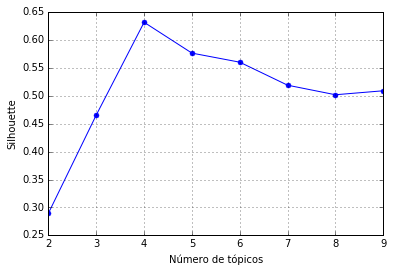

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(1)
plt.plot(range(2,10), sil, '.-', markersize = 10)
plt.ylabel('Silhouette')
plt.xlabel(u'Número de tópicos')
plt.grid('on')
plt.show()

Finalmente observamos que el coeficiente de *silhouette* se maximiza cuando proponemos una partición de 4 tópicos lo cual coincide con la cantidad de tópicos esperada en el corpus de prueba. La estimación de la cantidad de tópicos en un *corpus* (o *clusters* en cualquier tipo de datos) es probablemente el primer paso que se debe realizar y es muy importante explorar [diferentes metodologías](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set).

### Tfidf

Si bien obtuvimos muy buenos resultados con el corpus de prueba recordemos que el mismo fue preparado especialmente con 4 tópicos bastante disímiles entre si. Una ayuda que podemos darle al algoritmo de detección de tópicos es indicarle que términos son más importantes o especiales a priori. Esto ya lo habíamos especificado a partir de la construcción del corpus como una matriz **Tfidf**. Por lo tanto, aplicaremos **NMF** ahora sobre la descripción **Tfidf** de nuestro corpus. El esquema es análogo a lo hecho anteriormente.

In [22]:
# Cargado del corpus como tfidf
corpus_tfidf = pk.load(file('Tutorial_corpus_tfidf.pk','r'))

# Corpus para sklearn
corpus2sklearn = corpus2csc(corpus_tfidf).T

# Objeto nmf a partir de la clase NMF
nmf = NMF(n_components=4)

# Transformamos el corpus como tfidf al espacio de tópicos
corpus_transformed = nmf.fit_transform(corpus2sklearn)

# Vemos las etiquetas predichas por el algoritmo
labels_predicted = [np.argmax(d) for d in corpus_transformed]

# Comparamos el etiquetado de nmf con las verdaderas mediante información mutua
nmi = normalized_mutual_info_score(labels_predicted, labels_true)
print('Información mutua: {}'.format(nmi))

# Imprimimos los términos de cada tópico
nt = 0 # Indice auxiliar
for c in nmf.components_:
    
    m = len(c)
    l = range(m)
    ordered_index_list = sorted(l, reverse = True, key = lambda x: c[x])
    topic_terms = [dictionary[i] for i in ordered_index_list[:10]]
    print(u'Tópico {}: '.format(nt) + u', '.join(topic_terms))

    nt += 1

Información mutua: 0.873102088834
Tópico 0: aborto, debate, diputados, proyecto, mujeres, salud, vida, discusión, legalización, mujer
Tópico 1: dólar, centavos, mercado, bcra, banco, us, inflación, central, suba, cambio
Tópico 2: boca, river, copa, equipo, pavón, partido, superliga, libertadores, guillermo, barros
Tópico 3: trump, kim, cumbre, corea, estados, unidos, norte, blanca, presidente, aranceles


A pesar de que la información mutua no varió demasiado (esto es de vuelta, debido a que el corpus fue preparado especialmente para que sea fácil detectar los tópicos), podemos observar que algunas palabras que aparecen en la definición de los tópicos son más específicas del contexto de cada uno. La aplicación de **Tfidf** generalmente ayuda a mejorar bastante la performance de algunos algoritmos, en particular de **NMF**.

### Referencias:

- [Lee, Daniel D., and H. Sebastian Seung. "Learning the parts of objects by non-negative matrix factorization." Nature 401.6755 (1999): 788.](https://www.nature.com/articles/44565)
- [Xu, Wei, Xin Liu, and Yihong Gong. "Document clustering based on non-negative matrix factorization." Proceedings of the 26th annual international ACM SIGIR conference on Research and development in informaion retrieval. ACM, 2003.](https://dl.acm.org/citation.cfm?id=860485)
- [Lee, Daniel D., and H. Sebastian Seung. "Algorithms for non-negative matrix factorization." Advances in neural information processing systems. 2001.](http://papers.nips.cc/paper/1861-algorithms-for-non-negative-matrix-factorization)